In [35]:
import struct
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

In [36]:
data = open("datartl_00000001.bin", "rb").read()
(serial_no, cfreq, srate, tv_sec, tv_nsec, bufsize) = struct.unpack("@IIIIII", data[:24])
fulltime = tv_sec + (tv_nsec/1e9)

print ("Device serial number was", serial_no)
print ("Timestamp was", fulltime)
print ("Centre frequency was", cfreq)
print ("Sampling rate was", srate)
print ("Buffer size was", bufsize)

bindata = np.array(struct.unpack("B"*int(bufsize), data[24:])).astype(np.uint8)
bindata_complex = bindata[0::2] + bindata[1::2]*1j

bindata_complex = bindata_complex - np.mean(bindata_complex) # Remove DC

Device serial number was 1
Timestamp was 1690513413.2497213
Centre frequency was 145000000
Sampling rate was 3200000
Buffer size was 8388608


(143.4, 146.6)

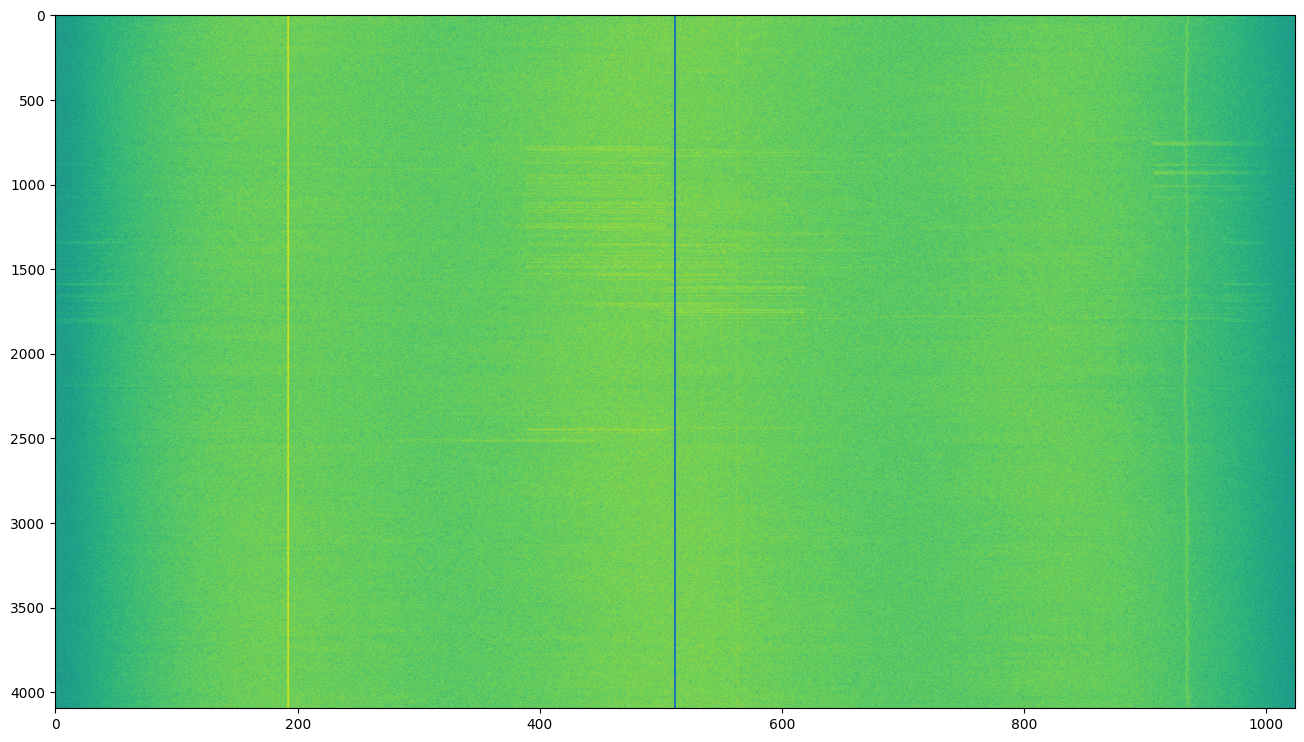

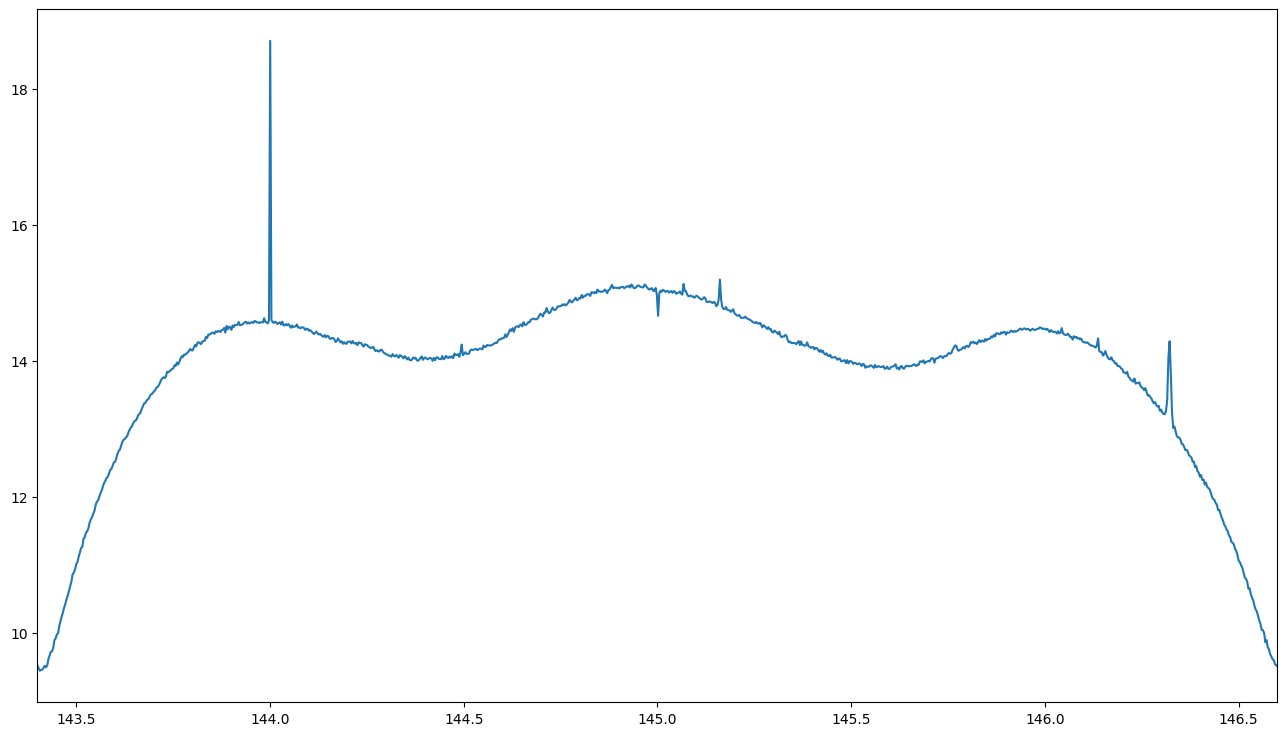

In [37]:
NFFT = 1024
Nsteps = int(bufsize/(2*NFFT))
wfall = np.zeros([Nsteps, NFFT], dtype=np.complex128)


for i in range(Nsteps):
    wfall[i,:] = np.fft.fftshift(np.fft.fft(bindata_complex[(i*NFFT): (i+1)*NFFT], NFFT))

freq = np.linspace(cfreq-(srate/2), cfreq+(srate/2), NFFT)/1e6

plt.figure(figsize=(16,9))
plt.imshow(np.log(np.abs(wfall)), aspect='auto')
plt.axvline(NFFT/2)

# plt.figure(figsize=(16,9))
# plt.pcolormesh(freq, np.arange(Nsteps), np.log(np.abs(wfall)), shading='gouraud', rasterized=True)

plt.figure(figsize=(16,9))
plt.plot(freq, np.log(np.mean(np.abs(wfall)**2, axis=0)))
plt.xlim(min(freq), max(freq))